In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
from datetime import date, timedelta

days=100

today = date.today()
end_date = today.strftime("%Y-%m-%d")

start_date = today - timedelta(days=days)
start_date = start_date.strftime("%Y-%m-%d")

In [4]:
import yfinance as yf
import pandas as pd

data = yf.download('BTC-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-07,63162.761719,64390.457031,62285.980469,62334.816406,62334.816406,25930730982
2024-05-08,62332.640625,62986.085938,60877.128906,61187.941406,61187.941406,26088172222
2024-05-09,61191.199219,63404.914062,60648.074219,63049.960938,63049.960938,25453338161
2024-05-10,63055.191406,63446.742188,60208.781250,60792.777344,60792.777344,27804954694
2024-05-11,60793.355469,61451.152344,60492.625000,60793.710938,60793.710938,13842272968
...,...,...,...,...,...,...
2024-08-10,60881.230469,61464.511719,60287.566406,60945.812500,60945.812500,15745822278
2024-08-11,60944.890625,61778.660156,58348.824219,58719.484375,58719.484375,22759754812
2024-08-12,58719.394531,60680.332031,57688.898438,59354.515625,59354.515625,37078637820


In [5]:
data["Date"] = data.index
data.reset_index(drop=True, inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,Date
0,63162.761719,64390.457031,62285.980469,62334.816406,62334.816406,25930730982,2024-05-07
1,62332.640625,62986.085938,60877.128906,61187.941406,61187.941406,26088172222,2024-05-08
2,61191.199219,63404.914062,60648.074219,63049.960938,63049.960938,25453338161,2024-05-09
3,63055.191406,63446.742188,60208.781250,60792.777344,60792.777344,27804954694,2024-05-10
4,60793.355469,61451.152344,60492.625000,60793.710938,60793.710938,13842272968,2024-05-11
...,...,...,...,...,...,...,...
95,60881.230469,61464.511719,60287.566406,60945.812500,60945.812500,15745822278,2024-08-10
96,60944.890625,61778.660156,58348.824219,58719.484375,58719.484375,22759754812,2024-08-11
97,58719.394531,60680.332031,57688.898438,59354.515625,59354.515625,37078637820,2024-08-12
98,59356.207031,61572.398438,58506.253906,60609.566406,60609.566406,30327698167,2024-08-13


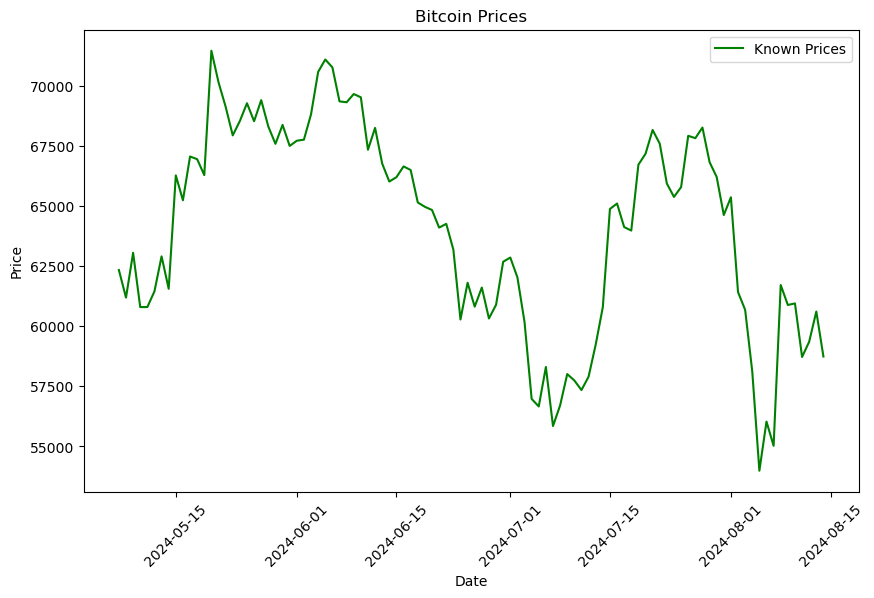

In [6]:
import matplotlib.pyplot as plt

dates = data['Date'] 

prices = data['Adj Close'] 

plt.figure(figsize=(10, 6))

plt.plot(dates, prices, color='green', label='Known Prices')
 
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Prices')

plt.xticks(rotation=45)

plt.legend()

plt.show()

In [7]:
import numpy as np

def create_dataset(serie, window_size=20):
    dataX, dataY = [], []
    for i in range(len(serie)-window_size-1):
        a = serie[i:(i+window_size), 0]  
        dataX.append(a)
        dataY.append([serie[i + window_size, 0]])
    return np.array(dataX), np.array(dataY)

In [8]:
from sklearn.preprocessing import MinMaxScaler

window_size=20

closedf=data[['Adj Close']]
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(closedf)
  
X, y = create_dataset(closedf, window_size)

In [9]:
X

array([[0.47794492, 0.41224679, 0.5189116 , ..., 0.83260941, 0.87499097,
        0.83215069],
       [0.41224679, 0.5189116 , 0.38961003, ..., 0.87499097, 0.83215069,
        0.88235829],
       [0.5189116 , 0.38961003, 0.38966351, ..., 0.83215069, 0.88235829,
        0.81944069],
       ...,
       [0.77871323, 0.68375974, 0.65193598, ..., 0.44216047, 0.39461302,
        0.39837657],
       [0.68375974, 0.65193598, 0.67514156, ..., 0.39461302, 0.39837657,
        0.27084254],
       [0.65193598, 0.67514156, 0.79743451, ..., 0.39837657, 0.27084254,
        0.30721997]])

In [10]:
y

array([[0.88235829],
       [0.81944069],
       [0.77830328],
       [0.82338034],
       [0.77333788],
       [0.78568403],
       [0.78824259],
       [0.84857343],
       [0.94956505],
       [0.97906969],
       [0.96041464],
       [0.87938128],
       [0.8772725 ],
       [0.89687632],
       [0.88910219],
       [0.76420772],
       [0.81628826],
       [0.7312329 ],
       [0.68853852],
       [0.69884435],
       [0.72451048],
       [0.71598942],
       [0.63868111],
       [0.62834418],
       [0.62080321],
       [0.5788448 ],
       [0.58780288],
       [0.52640646],
       [0.36008772],
       [0.44757408],
       [0.39066979],
       [0.43612636],
       [0.36253506],
       [0.39502923],
       [0.49762079],
       [0.50757039],
       [0.46042728],
       [0.35415922],
       [0.17106552],
       [0.15300212],
       [0.24701533],
       [0.10641463],
       [0.15544946],
       [0.2301558 ],
       [0.21487628],
       [0.19210101],
       [0.22386816],
       [0.300

In [11]:
len(y)

79

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [13]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import LSTM

model = Sequential()

model.add(Input(shape=(window_size, 1)))
 
model.add(LSTM(units=32,  dropout=0.1, activation="relu"))

model.add(Dense(1 , activation="relu"))

model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mse'])

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=10, batch_size=8)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 789ms/step - loss: 0.3333 - mse: 0.3333 - val_loss: 0.3326 - val_mse: 0.3326
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.3463 - mse: 0.3463 - val_loss: 0.3326 - val_mse: 0.3326
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.3667 - mse: 0.3667 - val_loss: 0.3326 - val_mse: 0.3326
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.3909 - mse: 0.3909 - val_loss: 0.3326 - val_mse: 0.3326
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 0.3472 - mse: 0.3472 - val_loss: 0.3326 - val_mse: 0.3326
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.4043 - mse: 0.4043 - val_loss: 0.3326 - val_mse: 0.3326
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.3813 - mse: 0.3813 - val_loss: 0.3326 - val_mse: 0.3326
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.3949 - mse: 0.3949 - val_loss: 0.3326 - val_mse: 0.3326
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.3766 - mse: 0.3

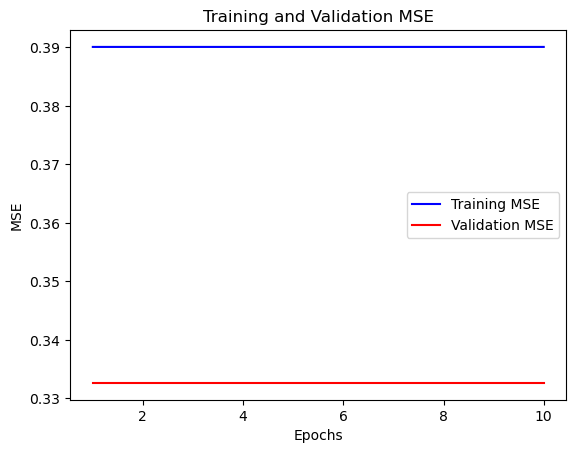

In [15]:
import matplotlib.pyplot as plt

train_mse = history.history['mse']
val_mse = history.history['val_mse']

epochs = range(1, len(train_mse) + 1)

plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [16]:
pred_steps = 10

predicted_prices=[]

X_pred=[X[-1]]

X_pred = np.array(X_pred)

for _ in range(pred_steps):
    
    prediction = model.predict([X_pred])
    
    price=prediction[0]
    
    predicted_prices.append(price)
    
    X_pred = np.append(X_pred, [price], axis=1)
    
    X_pred = X_pred[:, 1:]

predicted_prices = np.array(predicted_prices, dtype=object)
predicted_prices = scaler.inverse_transform(predicted_prices)
print(predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
[[53991.45703125]
 [53991.45703125]
 [53991.45703125]
 [53991.45703125]
 [53991.45703125]
 [53991.45703125]
 [53991.45703125]
 [53991.45703125]
 [53991.45703125]
 [53991.45703125]]


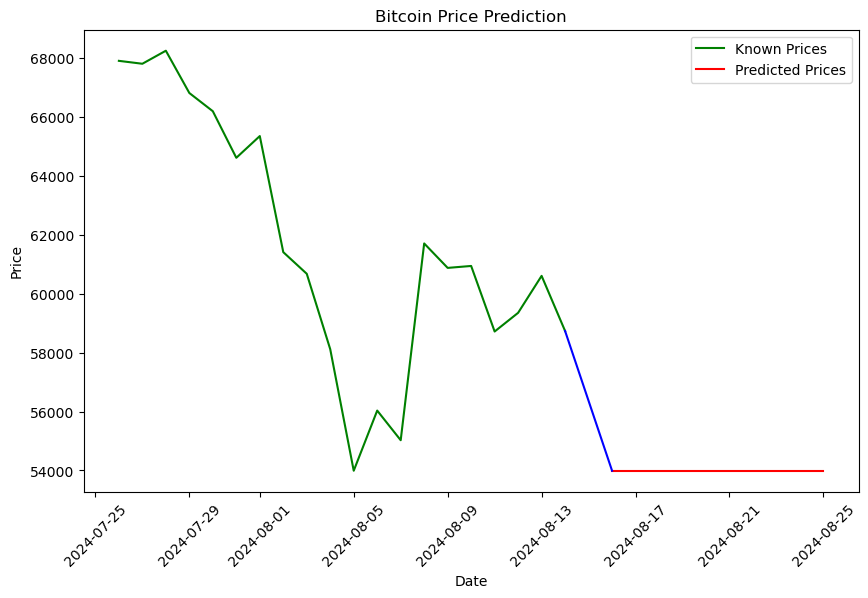

In [17]:
import matplotlib.pyplot as plt
previous_days=20

dates_known = data["Date"].iloc[-previous_days:].values

known_prices = data["Adj Close"].iloc[-previous_days:].values

dates_pred = pd.date_range(start=today + timedelta(days=1), periods=pred_steps).values

plt.figure(figsize=(10, 6))

plt.plot(dates_known, known_prices, color='green', label='Known Prices')

plt.plot(dates_pred, predicted_prices, color='red', label='Predicted Prices')

plt.plot([dates_known[-1], dates_pred[0]], [known_prices[-1], predicted_prices[0][0]], color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction')

plt.xticks(rotation=45)

plt.legend()

plt.show()